# Importing all the important libraries

In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Some figures

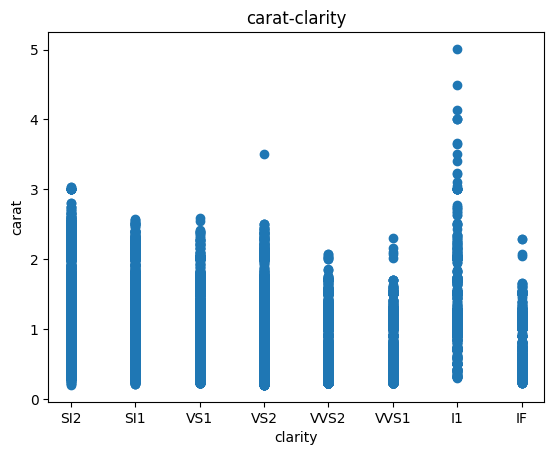

In [149]:
dataset=pd.read_csv("Pearl.csv")
carat = dataset.carat
clarity = dataset.clarity
plt.scatter(clarity, carat)
plt.xlabel('clarity')
plt.ylabel('carat')
plt.title('carat-clarity')
plt.show()

>This figure shows the relation between "carat" and "clarity"

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


[]

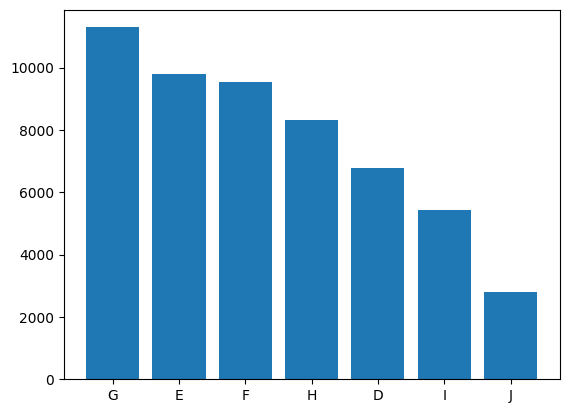

In [150]:
color = dataset['color'].value_counts()
print(color)
plt.bar(color.index, color.values)
plt.plot()

>This figure shows the number of each "color"

<Axes: xlabel='carat', ylabel='price'>

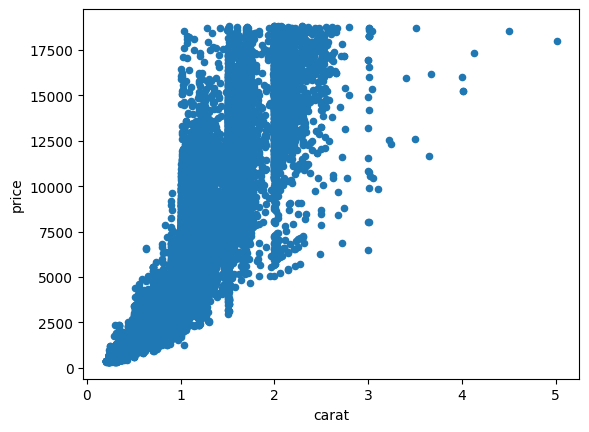

In [151]:
dataset.plot.scatter(x='carat', y='price')

#Pre-processing Phase

In [152]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [153]:
dataset=dataset.drop("Unnamed: 0",axis=1)

> Deleting a column which is unnamed



In [154]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



>Add a new column 'size' (length x width x depth) of the Pearl



In [155]:
dataset["size"]=dataset["x"]*dataset["y"]*dataset["z"]
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [156]:
dataset["cut"] = dataset["cut"].map({"Ideal": 1,
                               "Premium": 2,
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

>Here, we are mmapping the categorical values of "cut" into numerical values

In [157]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


# Splitting the dataset into the Training set and Test set

>As we know that all the columns are not necessary to build a model so we will take the most relavant columns which are essential

In [158]:
x=np.array(dataset[["carat","cut","size"]]) #Independent
y=dataset.iloc[:,6:7].values #Dependent
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

# Training the Random Forest Regression model

In [159]:
rf= RandomForestRegressor()
rf.fit(x,y)

<ipython-input-159-e99addd6655a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


RandomForestRegressor()

# Prediction

In [160]:
print("Pearl Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
features = np.array([[a, b, c]])
print("Predicted Pearl's Price = ", rf.predict(features))

Pearl Price Prediction
Carat Size: 0.50
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 5
Size: 90
Predicted Pearl's Price =  [1661.46]
